In [5]:
from skimage.metrics import structural_similarity
import imutils
import cv2
import requests
from PIL import Image

In [6]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [7]:
original = Image.open(requests.get("https://swarajya.gumlet.io/swarajya%2F2019-02%2F6dff1a72-4302-49c0-87b0-5ef4bf3a9b2b%2Fpancard_500x500.jpg?format=auto", stream=True).raw)
tampered = Image.open(requests.get("https://5.imimg.com/data5/VC/JQ/SU/ANDROID-33737889/product-jpeg-500x500.jpeg", stream=True).raw)

In [8]:
print(f'Oroginal Format: {original.format}')
print(f'Tampered Format: {tampered.format}')
print(f'Original Size: {original.size}')
print(f'Tampered Size: {tampered.size}')

Oroginal Format: JPEG
Tampered Format: JPEG
Original Size: (600, 400)
Tampered Size: (500, 323)


In [9]:
original = original.resize((250, 160))
tampered = tampered.resize((250, 160))
original.save('pan_card_tampering/image/original.jpg')
tampered.save('pan_card_tampering/image/tampered.jpg')

In [16]:
tampered = Image.open('pan_card_tampering/image/tampered.jpg')

In [19]:
original = cv2.imread('pan_card_tampering/image/original.jpg')
tampered = cv2.imread('pan_card_tampering/image/tampered.jpg')

In [20]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [21]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.2765972404156971


In [22]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [23]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original Format


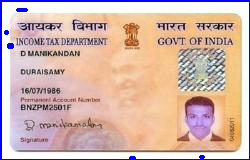

In [25]:
print('Original Format')
Image.fromarray(original)

Tampered Format


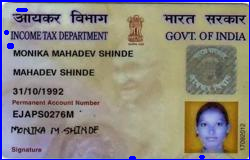

In [26]:
print('Tampered Format')
Image.fromarray(tampered)

Different Image


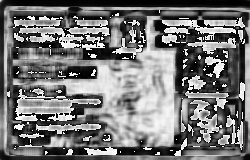

In [27]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


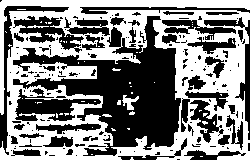

In [28]:
print('Threshold Image')
Image.fromarray(thresh)